## Pivot() function
The pivot() function is used to reshape a given dataframe organised by given index/ column values. 

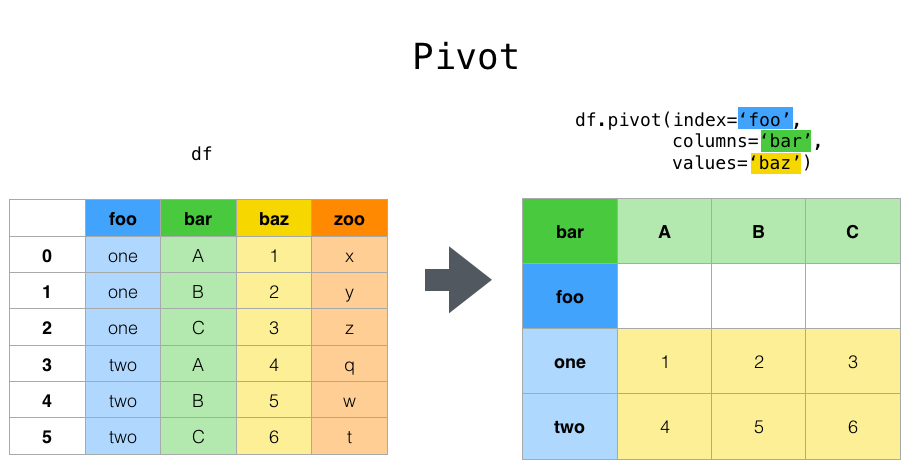

In [1]:
import pandas as pd

In [10]:
# reading data
df = pd.read_csv('https://gist.githubusercontent.com/alexdebrie/b3f40efc3dd7664df5a20f5eee85e854/raw/ee3e6feccba2464cbbc2e185fb17961c53d2a7f5/stocks.csv')
df

,date,symbol,open,high,low,close,volume
0,2019-03-01,AMZN,1655.13,1674.26,1651.00,1671.73,4974877
1,2019-03-04,AMZN,1685.00,1709.43,1674.36,1696.17,6167358
2,2019-03-05,AMZN,1702.95,1707.80,1689.01,1692.43,3681522
3,2019-03-06,AMZN,1695.97,1697.75,1668.28,1668.95,3996001
4,2019-03-07,AMZN,1667.37,1669.75,1620.51,1625.95,4957017
5,2019-03-01,AAPL,174.28,175.15,172.89,174.97,25886167
6,2019-03-04,AAPL,175.69,177.75,173.97,175.85,27436203
7,2019-03-05,AAPL,175.94,176.00,174.54,175.53,19737419
8,2019-03-06,AAPL,174.67,175.49,173.94,174.52,20810384
9,2019-03-07,AAPL,173.87,174.44,172.02,172.50,24796374


In [11]:
df.pivot(index= 'symbol', columns= 'date', values='volume')

date,2019-03-01,2019-03-04,2019-03-05,2019-03-06,2019-03-07
symbol,,,,,
AAPL,25886167,27436203,19737419,20810384,24796374
AMZN,4974877,6167358,3681522,3996001,4957017
GOOG,1450316,1446047,1443174,1099289,1166559


In [15]:
df.pivot_table(values = 'volume', index = 'symbol')

,volume
symbol,
AAPL,23733309.4
AMZN,4755355.0
GOOG,1321077.0


In [14]:
df.pivot_table(values = 'volume', index = 'symbol', aggfunc = ['mean', 'max', 'min'])

,mean,max,min
,volume,volume,volume
symbol,,,
AAPL,23733309.4,27436203,19737419
AMZN,4755355.0,6167358,3681522
GOOG,1321077.0,1450316,1099289


### Example 1

In [2]:
# creating a dataframe
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                  'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [17]:
# pivoting
df.pivot(index= 'foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [3]:
# pivoting
df.pivot(index= 'foo', columns='bar', values=['baz','zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [ ]:
# creating a dataframe
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6]})
df

In [4]:
# creating a new dataframe
d = {"zip_code": [12345, 56789, 101112, 131415],
"factory": [100, 400, 500, 600],
"warehouse": [200, 300, 400, 500],
"retail": [1, 2, 3, 4]
}

df = pd.DataFrame(d)
df

,zip_code,factory,warehouse,retail
0,12345,100,200,1
1,56789,400,300,2
2,101112,500,400,3
3,131415,600,500,4


In [5]:
# unpivoting all columns using the melt function
df = pd.melt(df, id_vars = "zip_code", var_name = "location_type", value_name = "distance")
df

,zip_code,location_type,distance
0,12345,factory,100
1,56789,factory,400
2,101112,factory,500
3,131415,factory,600
4,12345,warehouse,200
5,56789,warehouse,300
6,101112,warehouse,400
7,131415,warehouse,500
8,12345,retail,1
9,56789,retail,2


In [6]:
# pivoting
df = df.pivot(index = 'zip_code', columns  = 'location_type')
df = df['distance'].reset_index()
df.columns.name = None
df

,zip_code,factory,retail,warehouse
0,12345,100,1,200
1,56789,400,2,300
2,101112,500,3,400
3,131415,600,4,500
